# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

I decided to not include 2025 data for now since it's incomplete. Not all licensure exams have been administered this year.

In [2]:
# Load the three datasets uploaded by the user
file_2023 = "PRC 2023.csv"
file_2024 = "PRC 2024.csv"

df_2023 = pd.read_csv(file_2023)
df_2024 = pd.read_csv(file_2024)

# Display basic info about each dataframe to check structure
df_2023_info = df_2023.info()
df_2024_info = df_2024.info()

df_2023_head = df_2023.head()
df_2024_head = df_2024.head()

(df_2023_info, df_2023_head,
 df_2024_info, df_2024_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_sector    46 non-null     object 
 1   year          46 non-null     int64  
 2   passers       46 non-null     int64  
 3   examinees     46 non-null     int64  
 4   passing_rate  46 non-null     float64
 5   source        46 non-null     object 
 6   Unnamed: 6    33 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_sector    46 non-null     object 
 1   year          46 non-null     int64  
 2   passers       46 non-null     int64  
 3   examinees     46 non-null     int64  
 4   passing_rate  46 non-null     float64
 5   source        46 non-null     object 
dty

(None,
              job_sector  year  passers  examinees  passing_rate  \
 0           Accountancy  2023     2740       8734         31.37   
 1           Agriculture  2023     3423      10014         34.18   
 2          Architecture  2023     2924       4784         61.12   
 3  Chemical Engineering  2023      651        927         70.23   
 4             Chemistry  2023      594       1148         51.74   
 
                                               source  \
 0  https://www.philstar.com/exam-results/2023/10/...   
 1  https://www.thesummitexpress.com/2023/11/full-...   
 2  https://www.philstar.com/exam-results/2023/06/...   
 3  https://www.thesummitexpress.com/2023/10/full-...   
 4  https://www.philstar.com/other-sections/exam-r...   
 
                                   Unnamed: 6  
 0  and%20Zamboanga%20last%20September%202023  
 1        working%20days%20after%20the%20exam  
 2              June%209%20and%2011%2C%202023  
 3       the%20last%20day%20of%20examinations  

# Cleaning the Data

Keeping only necessary columns. No need for sources.

In [3]:
cols_to_keep = ["job_sector", "year", "passers", "examinees", "passing_rate"]
df_2023 = df_2023[cols_to_keep]
df_2024 = df_2024[cols_to_keep]

Combining datasets and dropping duplicates

In [4]:
df_all = pd.concat([df_2023, df_2024], ignore_index=True).drop_duplicates()

Pivot for sector-to-sector comparison (passing rates)

In [5]:
# Pivot for sector-to-sector comparison (passing rates)
df_compare = df_all.pivot(index="job_sector", columns="year", values="passing_rate").reset_index()

Computing for absolute and relative change

In [16]:
df_compare["abs_change"] = df_compare[2024] - df_compare[2023]
df_compare["rel_change_%"] = ((df_compare[2024] - df_compare[2023]) / df_compare[2023]) * 100
df_compare_sorted = df_compare.sort_values("abs_change", ascending=True)

df_compare_sorted


year,job_sector,2023,2024,abs_change,rel_change_%
24,Mechanical Engineering,50.34,32.83,-17.51,-34.783472
21,Interior Design,45.60,29.75,-15.85,-34.758772
23,Library Science,62.64,48.77,-13.87,-22.142401
9,Customs Brokers,57.07,44.06,-13.01,-22.796566
11,Dentistry,75.00,67.83,-7.17,-9.560000
26,Medicine,63.24,58.26,-4.98,-7.874763
32,Nutrition and Dietetics,73.42,69.73,-3.69,-5.025879
39,Psychometrician,73.27,69.78,-3.49,-4.763205
25,Medical Technology,72.06,69.47,-2.59,-3.594227
0,Accountancy,31.37,30.17,-1.20,-3.825311


In [ ]:
# Biggest gains (improvements in passing rate)
df_gains = df_compare.sort_values("abs_change", ascending=False)
df_gains.head(10)  # Top 10 gainers

year,job_sector,2023,2024,abs_change,rel_change_%
45,Veterinary Medicine,9.34,46.92,37.58,402.355460
15,Fisheries Technology,33.71,66.60,32.89,97.567487
41,Real Estate Service,43.75,76.05,32.30,73.828571
40,Radiologic Technology,31.12,57.55,26.43,84.929306
10,Dental Medicine,43.88,67.83,23.95,54.580675
12,Electrical Engineering,30.87,54.12,23.25,75.315841
34,Optometry,67.69,90.83,23.14,34.185256
2,Agricultural Engineering,33.41,56.34,22.93,68.632146
19,Geology,47.01,67.62,20.61,43.841736
43,Sanitary Engineering,46.91,67.31,20.40,43.487529


In [ ]:
# Biggest drops (declines in passing rate)
df_drops = df_compare.sort_values("abs_change", ascending=True)
df_drops.head(10)  # Top 10 losers

year,job_sector,2023,2024,abs_change,rel_change_%
24,Mechanical Engineering,50.34,32.83,-17.51,-34.783472
21,Interior Design,45.60,29.75,-15.85,-34.758772
23,Library Science,62.64,48.77,-13.87,-22.142401
9,Customs Brokers,57.07,44.06,-13.01,-22.796566
11,Dentistry,75.00,67.83,-7.17,-9.560000
26,Medicine,63.24,58.26,-4.98,-7.874763
32,Nutrition and Dietetics,73.42,69.73,-3.69,-5.025879
39,Psychometrician,73.27,69.78,-3.49,-4.763205
25,Medical Technology,72.06,69.47,-2.59,-3.594227
0,Accountancy,31.37,30.17,-1.20,-3.825311


## Scatter plot: examinees vs. passing rate

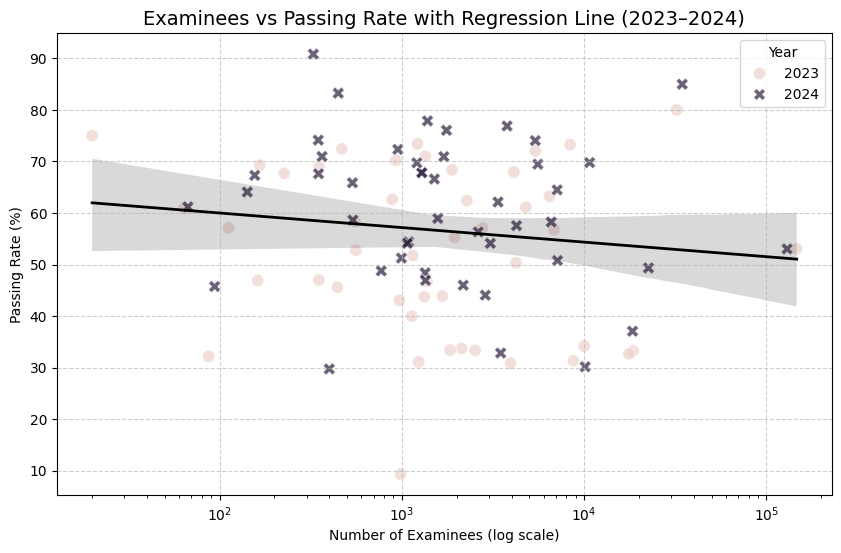

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Scatter points
sns.scatterplot(
    data=df_all,
    x="examinees",
    y="passing_rate",
    hue="year",
    style="year",
    s=80,
    alpha=0.7
)

# Regression line (logarithmic x-axis handled by taking log transform)
sns.regplot(
    data=df_all,
    x="examinees",
    y="passing_rate",
    scatter=False,        # don’t duplicate scatter points
    logx=True,            # log-transform x for regression fit
    line_kws={"color":"black", "lw":2}  # style of regression line
)

plt.title("Examinees vs Passing Rate with Regression Line (2023–2024)", fontsize=14)
plt.xlabel("Number of Examinees (log scale)")
plt.ylabel("Passing Rate (%)")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Year")
plt.show()


In [18]:
df_compare.columns

Index(['job_sector', 2023, 2024], dtype='object', name='year')

In [19]:
df_compare[2023]

0     31.37
1     43.05
2     33.41
3     34.18
4     61.12
5     70.23
6     51.74
7     33.26
8     32.68
9     57.07
10    43.88
11    75.00
12    30.87
13    33.36
14    69.28
15    33.71
16    39.98
17    55.26
18    46.77
19    47.01
20    52.77
21    45.60
22    57.14
23    62.64
24    50.34
25    72.06
26    63.24
27    60.94
28    67.98
29    68.95
30    32.18
31    80.00
32    73.42
33    58.30
34    67.69
35    62.42
36    68.37
37    53.07
38    72.44
39    73.27
40    31.12
41    43.75
42    71.00
43    46.91
44    56.75
45     9.34
Name: 2023, dtype: float64

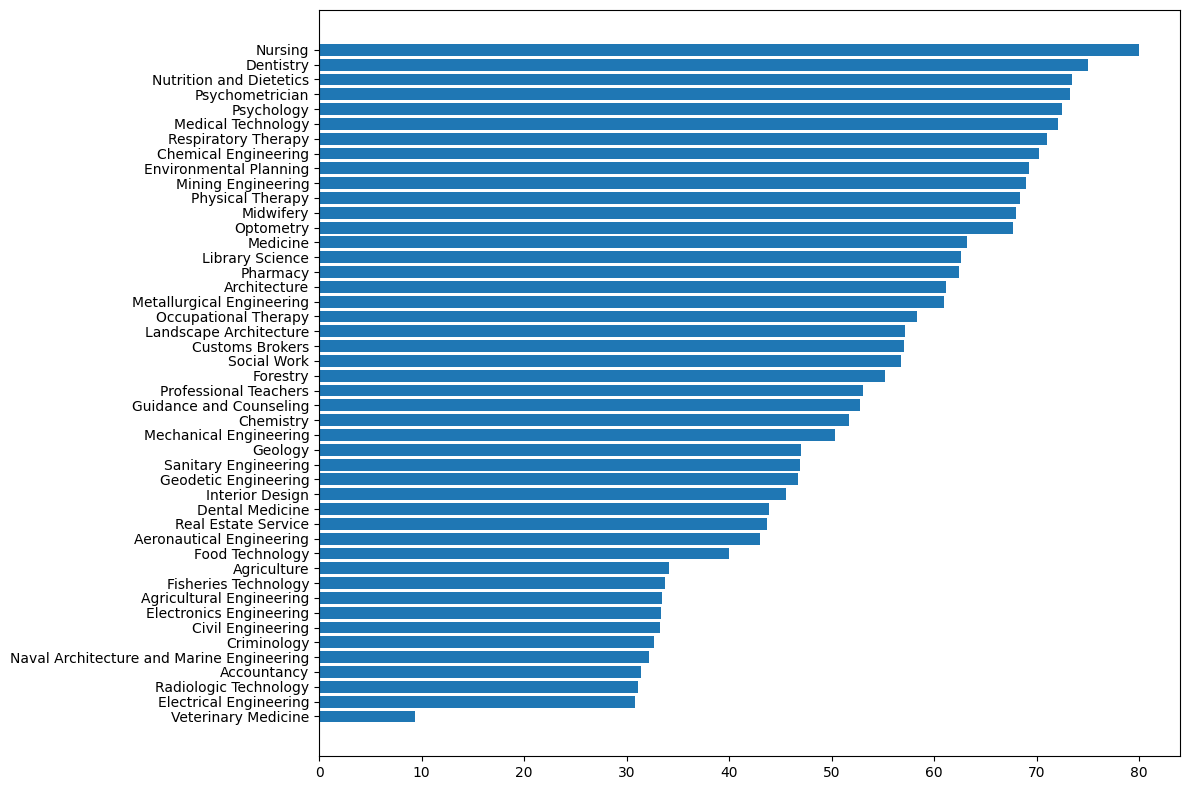

In [25]:
df_compare.sort_values(by=2023, inplace=True)
plt.figure(figsize=(12, 8))
plt.barh(width=df_compare[2023],
         y=df_compare['job_sector'])

plt.tight_layout()

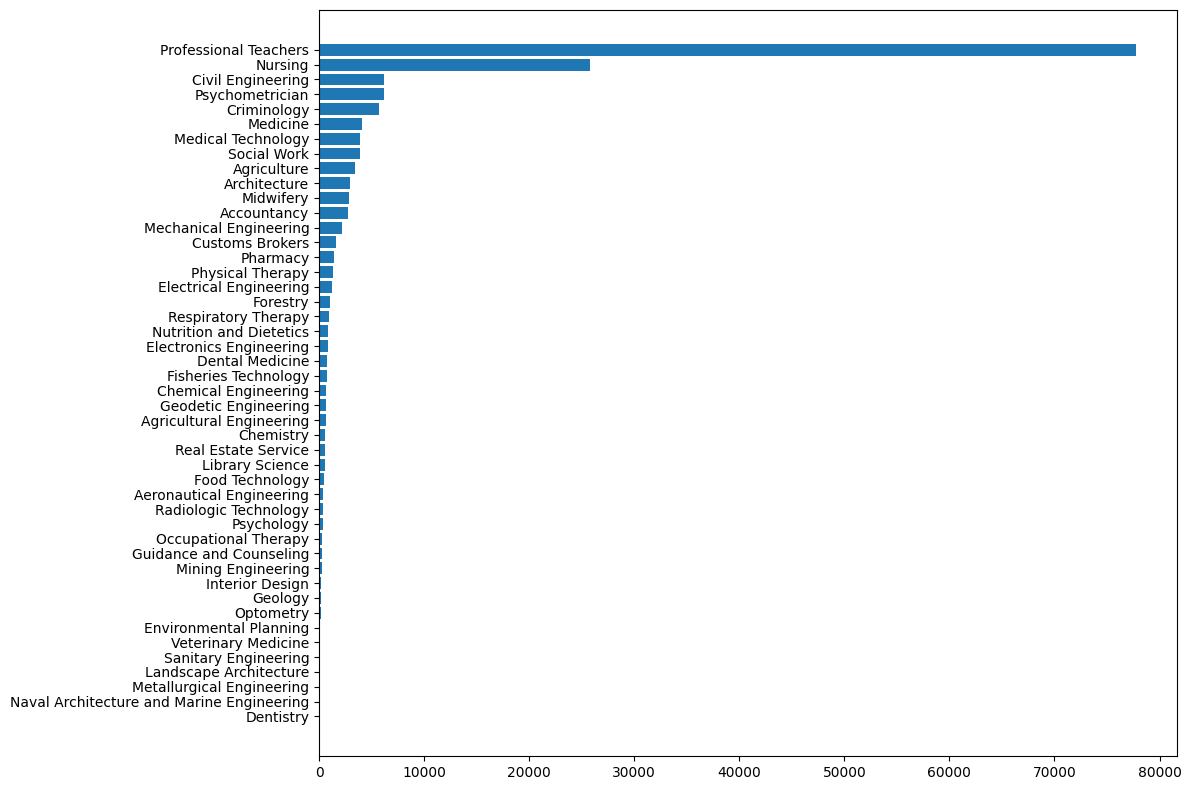

In [29]:
df_2023.sort_values(by='passers', inplace=True)
plt.figure(figsize=(12, 8))
plt.barh(width=df_2023['passers'],
         y=df_2023['job_sector'])
#plt.xscale('log')

plt.tight_layout()

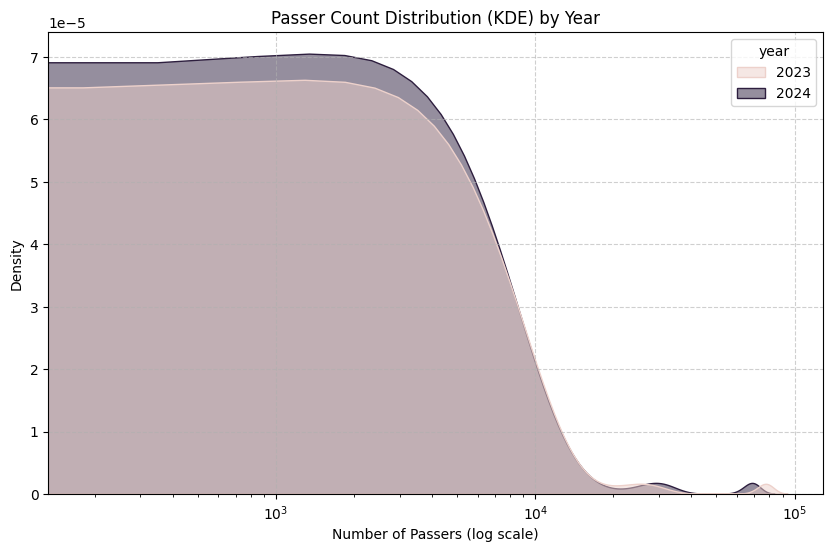

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_all,
    x="passers",
    hue="year",
    common_norm=False,
    fill=True,
    alpha=0.5
)

plt.xscale("log")
plt.xlabel("Number of Passers (log scale)")
plt.ylabel("Density")
plt.title("Passer Count Distribution (KDE) by Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


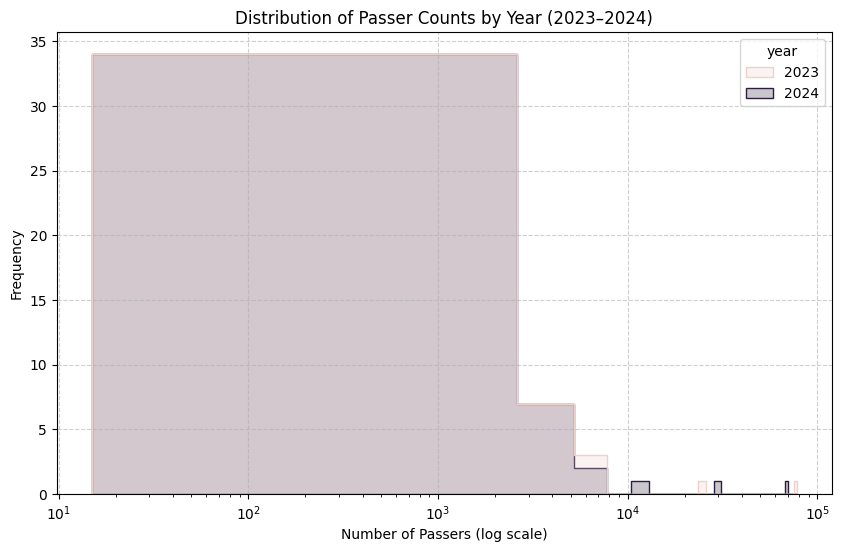

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(
    data=df_all,
    x="passers",
    bins=30,
    hue="year",
    element="step",
    kde=False
)

plt.xscale("log")   # log scale since counts vary a lot
plt.xlabel("Number of Passers (log scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Passer Counts by Year (2023–2024)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
